In [16]:
#Importing general libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# General Statistics

In [17]:
#Importing data from CheckM
#checkm_data is a table containing various information among which, Contamination and Completeness
bins_stats = pd.read_csv('bin_stats_ext.tsv', sep = '\t', names =['bin_name','stats'])

In [18]:
#transform bins_stats in an actual output that can be used 
g_dict = {}
i = 0
for b in bins_stats['bin_name']:
    e_dict = {}
    i_e = 0
    for e in bins_stats.iloc[i,1].strip('{}').split(','):
        if i_e <= 26:
            e_dict[e.split(':')[0].strip(' "\'')]=e.split(':')[1]
            i_e += 1
    g_dict[b] = e_dict
    i += 1

In [19]:
#stats is a DataFrame containing the stats per bin of bins_stats
stats = pd.DataFrame(g_dict).transpose().round(2)
stats.reset_index(inplace=True, drop = False, names = 'Bin Name')

In [20]:
#Visualizing the first 3 lines of stats table
stats.head(3)

,Bin Name,marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,...,# contigs,Longest scaffold,Longest contig,N50 (scaffolds),N50 (contigs),Mean scaffold length,Mean contig length,Coding density,Translation table,# predicted genes
0,bin.4,'root',5656,56,24,56,0,0,0,0,...,40,15919,15919,7063,7063,6550.025,6550.025,0.8725386544326167,11,251
1,bin.3,'root',5656,56,24,56,0,0,0,0,...,18,110609,110609,26187,26187,20379.61111111111,20379.61111111111,0.9533657004686056,11,463
2,bin.2,'root',5656,56,24,45,0,6,0,4,...,48,74193,74193,40773,40773,22930.3125,22930.3125,0.9379015222753724,11,1140


In [21]:
#Converting Completeness and Contamination values to float in order to filter
stats['Completeness'] = stats['Completeness'].apply(float) 
stats['Contamination'] = stats['Contamination'].apply(float)

In [22]:
#Filter for Completeness>=50 and Contamination<=10
stats.query('Completeness>=50 & Contamination<=10')

,Bin Name,marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,...,# contigs,Longest scaffold,Longest contig,N50 (scaffolds),N50 (contigs),Mean scaffold length,Mean contig length,Coding density,Translation table,# predicted genes
5,bin.1,'k__Bacteria',5449,104,58,34,53,17,0,0,...,212,20314,20314,4372,4372,4469.056603773585,4469.056603773585,0.962491556193532,11,1114
8,bin.12,'o__Actinomycetales',488,310,185,26,279,5,0,0,...,169,55177,55177,17984,17984,11895.526627218935,11895.526627218935,0.9263688204605779,11,2144
10,bin.6,'f__Rhodobacteraceae',46,654,332,248,403,3,0,0,...,441,12440,12440,4336,4336,4231.922902494331,4231.922902494331,0.8759825706566761,11,2116


In [23]:
#Sort values for completeness
stats_o = stats.sort_values(by='Completeness', ascending = False)

[]

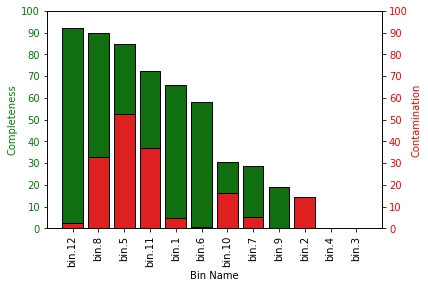

In [25]:
fig,ax = plt.subplots()

ax1 = ax.twinx()
ax1.set_ylim(0,100)
ax1.set_yticks(np.arange(0,110,10), [str(e) for e in np.arange(0,110,10)],color='red')
ax1.set_ylabel('Contamination', color='red')

ax.set_ylim(0,100)
ax.set_ylim(0,100)
ax.set_yticks(np.arange(0,110,10), [str(e) for e in np.arange(0,110,10)],color='green')
ax.set_ylabel('Completeness', color='green')

ax.set_xticks(np.arange(0,12,1), stats_o['Bin Name'].values, rotation = 90)

sns.barplot(data=stats_o, x = 'Bin Name', y = 'Completeness', color = 'green',ax = ax, edgecolor ='black')
sns.barplot(data=stats_o, x = 'Bin Name', y = 'Contamination',color = 'red',ax = ax1,edgecolor ='black')

plt.plot()

# Taxonomy

In [28]:
#Importing the taxonomy obtained with GTDB-Tk
tax = pd.read_csv('gtdbtk.bac120.summary.tsv', sep = '\t')

In [29]:
#Visualizing the first 3 rows
tax.head(3)

,user_genome,classification,closest_genome_reference,closest_genome_reference_radius,closest_genome_taxonomy,closest_genome_ani,closest_genome_af,closest_placement_reference,closest_placement_radius,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",msa_percent,translation_table,red_value,warnings
0,bin.1,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,GCA_905182065.1,95.0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,98.83,0.736,GCA_905182065.1,95.0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,98.83,0.736,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_002457075.1, s__Marisimplicoccus sp0024570...",47.35,11.0,NaN,Genome has more than 13.3% of markers with mul...
1,bin.10,d__Bacteria;p__;c__;o__;f__;g__;s__,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d__Bacteria;p__Planctomycetota;c__Phycisphaera...,taxonomic novelty determined using RED,classification based on consensus between back...,NaN,25.42,11.0,0.40882,NaN
2,bin.11,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,taxonomic classification defined by topology a...,classification based on placement in class-lev...,"GCA_905181835.1, s__GCA-002733185 sp905181835,...",41.55,11.0,0.98134,Genome has more than 25.0% of markers with mul...


In [30]:
tx_c = tax.copy()

In [34]:
#Grouping at order level
tx_c['classification'] = [e[-4] if len(e) >= 2 else e[0] for e in tx_c['classification'].str.split(';')]
tx_c['classification'] = ['Unclassified' if e == 'o__' else e for e in tx_c['classification']]

In [35]:
#Selecting only the bins which resulted with Completeness>=50 and Contamination<=10
select_tax = tax[['user_genome', 'classification', 'closest_genome_taxonomy', 'closest_genome_ani']].query('user_genome=="bin.1" | user_genome=="bin.12" | user_genome=="bin.6"')

[]

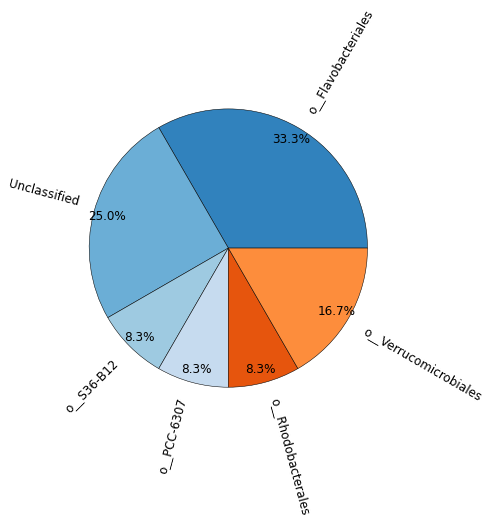

In [36]:
#Plotting the taxonomy structure
fig, ax = plt.subplots()
labels = tx_c['classification'].unique().tolist()
sizes = tx_c.groupby('classification')['classification'].count()
ax.pie(sizes, labels=labels,autopct='%1.1f%%', 
       pctdistance = 0.9, labeldistance=1.1, 
       textprops={'size': 'large'}, radius = 1.6, 
       wedgeprops={"edgecolor":"k",'linewidth': .5},
       rotatelabels = True, colors = sns.color_palette('tab20c'))

plt.plot()

# Community Structure

In [61]:
#Importing the contig depth calculated during the binning phase with MetaBat2
depth = pd.read_csv('final.contigs.fa.depth.txt', sep = '\t')

In [63]:
#Visualizing the first 3 rows of the imported table
depth.head(3)

,contigName,contigLen,totalAvgDepth,M19-81.bam,M19-81.bam-var,M19-84.bam,M19-84.bam-var,M19-88.bam,M19-88.bam-var
0,k141_1379,1888,11.2716,5.75777,9.6033,3.18700,4.11182,2.32681,2.49646
1,k141_59274,1673,18.7663,6.74458,36.0760,4.53316,15.77470,7.48851,35.90460
2,k141_92346,1927,158.6500,18.74110,44.5963,74.19860,513.39200,65.71020,347.90200


In [65]:
#Importing from BioPython the SeqIO function to retrieve the ID of the contigs
#inside each bin
from Bio import SeqIO

In [84]:
#Calculating the feature table for our MAGs based on the average depth of contigs in our samples
#we obtain the value by:
#1.retrieving the contigs in the MAG
contig_bin1 = [rec.id for rec in SeqIO.parse('metabat/bin.1.fa','fasta')]
#2.creating a table with such contigs
contig_bin1 = pd.DataFrame(contig_bin1, columns = ['contigName'])
#3.calculating the average depth using the depth of every contig in our MAG
count_bin1 = pd.DataFrame(contig_bin1.merge(depth).mean(numeric_only=True)[['M19-81.bam','M19-84.bam','M19-88.bam']], columns = ['bin.1'])

#we repeat the process for all the MAG of interest

contig_bin12 = [rec.id for rec in SeqIO.parse('metabat/bin.12.fa','fasta')]
contig_bin12 = pd.DataFrame(contig_bin12, columns = ['contigName'])
count_bin12 = pd.DataFrame(contig_bin12.merge(depth).mean(numeric_only=True)[['M19-81.bam','M19-84.bam','M19-88.bam']], columns = ['bin.12'])

contig_bin6 = [rec.id for rec in SeqIO.parse('metabat/bin.6.fa','fasta')]
contig_bin6 = pd.DataFrame(contig_bin6, columns = ['contigName'])
count_bin6 = pd.DataFrame(contig_bin6.merge(depth).mean(numeric_only=True)[['M19-81.bam','M19-84.bam','M19-88.bam']], columns = ['bin.6'])

In [101]:
#Our final result is a feature table with the absolute count of every MAG in every sample
count_table = pd.concat([count_bin1, count_bin12, count_bin6], axis = 1)

In [115]:
#Visualizing the table
count_table

,bin.1,bin.12,bin.6
M19-81.bam,3.104162,2.631952,5.987388
M19-84.bam,3.677443,9.798408,3.219477
M19-88.bam,3.671614,6.285059,2.938957


In [171]:
#We now need to calculate the feature table with the relative abundance 
#in order to normalize difference between sample and being able to compare them
rel_table = count_table.divide(count_table.sum(axis = 1),axis = 0)

In [131]:
#Importing the metadata usefull to provide additional information to our findings
lst_c = ['station','depth','bottom','sampleA','sampleB', 'sample', 'date', 'lon', 'lat', 'class']
metadata = pd.read_csv('metadata.csv', header = None, names = lst_c)

In [139]:
#Create a dictionary to convert a particular sample to its defined class
class_d = dict(zip(metadata['sample'].values,metadata['class'].values))

In [158]:
#Create a dictionary to convert a particular genome to its taxonomy classification
tx_d = dict(zip(tax['user_genome'].values, tax['classification'].values))

In [173]:
#Converting the MAGs number to their taxonomy classification
rel_table.columns = [tx_d[e] for e in rel_table.columns]

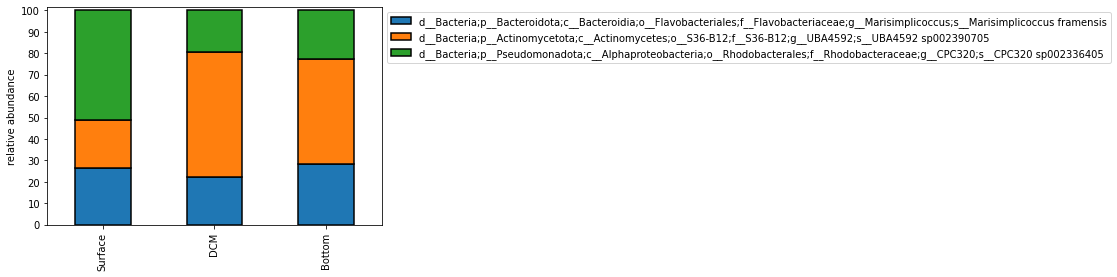

In [191]:
#Plotting the relative abundance of our MAGs

rel_table.plot(kind='bar',subplots=False, stacked = True, edgecolor = 'black', linewidth = 1.5)
plt.xticks(range(3), [class_d[e.replace('-','_').split('.')[0]] for e in rel_table.index.tolist()])
plt.ylabel('relative abundance')
plt.yticks(np.arange(0,1.1,0.1),[str(e) for e in range(0,110,10)])
plt.ylim(0,1.015)

plt.legend(bbox_to_anchor = (1,1))

plt.show()